<a href="https://colab.research.google.com/github/JomarQr/Artificial-Intelligence-path/blob/main/Tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task 1 (35 points)

Explore the pytorch documentation and complete the exercises below. Hint: the most relevant example is 2-nd from below at the page
https://pytorch.org/docs/stable/autograd.html

Exercise 1.1

In [ ]:
import torch

# Define a tensor with requires_grad=True to enable tracking of gradients
x = torch.tensor(2.0, requires_grad=True)

# Define the function f(x) = x^2 + 3x + 5
f = x**2 + 3*x + 5


# Compute the gradient using backpropagation
f.backward()

# Print the gradient of f with respect to x
print(f"The value of f(x): {f.item()}")
print(f"The gradient of f with respect to x (df/dx): {x.grad.item()}")

The value of f(x): 15.0
The gradient of f with respect to x (df/dx): 7.0


Exercise 1.2: Gradient of Multivariable Function

 $f(x,y)=x^5-y^3+3*x*y$

In [ ]:
# Define tensors for x (at point 2.0) and y (at point 3.0) with requires_grad=True
x = torch.tensor(2.0, requires_grad = True)
y = torch.tensor(3.0, requires_grad = True)

# Define the function f(x, y)
f = x**5 - y**3 + 3*x*y

# Compute gradients
f.backward()

# Print the gradients
print(f"The value of f(x, y): {f.item()}")
print(f"Gradient of f with respect to x (df/dx): {x.grad.item()}")
print(f"Gradient of f with respect to y (df/dy): {y.grad.item()}")


The value of f(x, y): 23.0
Gradient of f with respect to x (df/dx): 89.0
Gradient of f with respect to y (df/dy): -21.0


### Task 2(35 points)

Let's consider the [Kepler stellar dataset](https://archive.stsci.edu/search_fields.php?mission=kepler_stellar17) that you have investigated in the previous homework. Predict the mass $y$ based on the other features $X$.


*   Do the train/test split.
*   Define 2 neural network architectures (on basis of `nn.Module`) in pytorch.
*   Write the function to train a neural network. It should take NN, data and optimizer(3 different https://pytorch.org/docs/stable/optim.html) as an input.
*   Draw the Learning curve for each model. Evaluate the performance on both train and test dataset. Comment the results.

Together there should be $2(architectures)\times 3(optimizers) = 6 \, models $ considered for this taks.




In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kepler_stellar_17.csv to kepler_stellar_17 (1).csv


In [ ]:
path = 'kepler_stellar_17.csv'
data = pd.read_csv(path)

In [ ]:
data.head()

,teff,logg,feh,mass,st_radius,dens,kepmag,dist,degree_ra,degree_dec,jmag,hmag,kmag,av
0,5160,3.580,-0.10,1.357,3.128,0.062460,11.678,516.78,291.03873,36.598129,10.126,9.667,9.559,0.320
1,5519,3.822,-0.22,1.077,2.109,0.161800,13.152,751.14,291.04306,36.593811,11.656,11.193,11.094,0.432
2,4706,2.374,-0.10,2.061,15.447,0.000788,9.196,658.68,291.05588,36.559952,7.467,6.853,6.722,0.393
3,6543,4.082,-0.24,1.180,1.638,0.378100,11.901,490.57,291.09540,36.564941,10.852,10.662,10.627,0.305
4,5332,4.500,-0.08,0.821,0.843,1.928000,15.264,731.73,291.13760,36.577381,13.665,13.262,13.118,0.425


In [ ]:
data.shape

(200038, 14)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kepler_stellar_17.csv to kepler_stellar_17.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kepler_stellar_17.csv to kepler_stellar_17 (1).csv


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")  # Use GPU
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")  # Use CPU
    print("Using CPU.")

Using CPU.


In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
class DeepNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
def load_and_preprocess_data():
    # Load the dataset
    data = pd.read_csv('kepler_stellar_17.csv')

    # Check for missing values
    if data.isnull().any().any():
        print("Dataset contains missing values. Handling missing values...")
        data = data.fillna(0)  # Replace missing values with 0

    # Separate features (X) and target (y)
    X = data.drop(columns=['mass']).values
    y = data['mass'].values

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the features
    scaler_X = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)

    # Normalize the target values
    scaler_y = StandardScaler()
    y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
    y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

    return X_train, X_test, y_train, y_test, scaler_X, scaler_y


In [ ]:
def train_model(model, train_loader, test_loader, optimizer, criterion, num_epochs=100, clip_value=1.0):
    train_losses = []
    test_losses = []

    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)  # Move data to device
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)

            optimizer.step()
            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        # Evaluate on test set
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)  # Move data to device
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                test_loss += loss.item()

        test_loss = test_loss / len(test_loader)
        test_losses.append(test_loss)

        # Adjust learning rate
        scheduler.step(test_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

    return train_losses, test_losses

In [ ]:
if __name__ == "__main__":
    # Load and preprocess data
    X_train, X_test, y_train, y_test, scaler_X, scaler_y = load_and_preprocess_data()

    # Convert data to PyTorch tensors
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

    # Create DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Define models
    input_size = X_train.shape[1]
    output_size = 1
    hidden_size = 64
    hidden_size1 = 128
    hidden_size2 = 64

    model1 = SimpleNN(input_size, hidden_size, output_size).to(device)
    model2 = DeepNN(input_size, hidden_size1, hidden_size2, output_size).to(device)

    # Define optimizers
    optimizers = {
        "SGD": optim.SGD(model1.parameters(), lr=0.001),  # Reduced learning rate
        "Adam": optim.Adam(model1.parameters(), lr=0.0001),  # Reduced learning rate
        "RMSprop": optim.RMSprop(model1.parameters(), lr=0.0001)  # Reduced learning rate
    }

    # Define the loss function
    criterion = nn.MSELoss()

    # Train and evaluate models
    results = {}
    for model_name, model in [("SimpleNN", model1), ("DeepNN", model2)]:
        for opt_name, optimizer in optimizers.items():
            print(f"Training {model_name} with {opt_name} optimizer...")
            train_losses, test_losses = train_model(model, train_loader, test_loader, optimizer, criterion)
            results[f"{model_name}_{opt_name}"] = {"train_losses": train_losses, "test_losses": test_losses}

Dataset contains missing values. Handling missing values...
Training SimpleNN with SGD optimizer...


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/100], Train Loss: 0.4415, Test Loss: 0.3229
Epoch [2/100], Train Loss: 0.2963, Test Loss: 0.2723
Epoch [3/100], Train Loss: 0.2635, Test Loss: 0.2582
Epoch [4/100], Train Loss: 0.2520, Test Loss: 0.2387
Epoch [5/100], Train Loss: 0.2314, Test Loss: 0.2153
Epoch [6/100], Train Loss: 0.2054, Test Loss: 0.1945
Epoch [7/100], Train Loss: 0.1835, Test Loss: 0.1704
Epoch [8/100], Train Loss: 0.1632, Test Loss: 0.1547
Epoch [9/100], Train Loss: 0.1488, Test Loss: 0.1415
Epoch [10/100], Train Loss: 0.1356, Test Loss: 0.1289
Epoch [11/100], Train Loss: 0.1229, Test Loss: 0.1168
Epoch [12/100], Train Loss: 0.1105, Test Loss: 0.1054
Epoch [13/100], Train Loss: 0.0991, Test Loss: 0.0950
Epoch [14/100], Train Loss: 0.0888, Test Loss: 0.0848
Epoch [15/100], Train Loss: 0.0794, Test Loss: 0.0764
Epoch [16/100], Train Loss: 0.0713, Test Loss: 0.0693
Epoch [17/100], Train Loss: 0.0641, Test Loss: 0.0620
Epoch [18/100], Train Loss: 0.0582, Test Loss: 0.0572
Epoch [19/100], Train Loss: 0.0529, T

KeyboardInterrupt: 

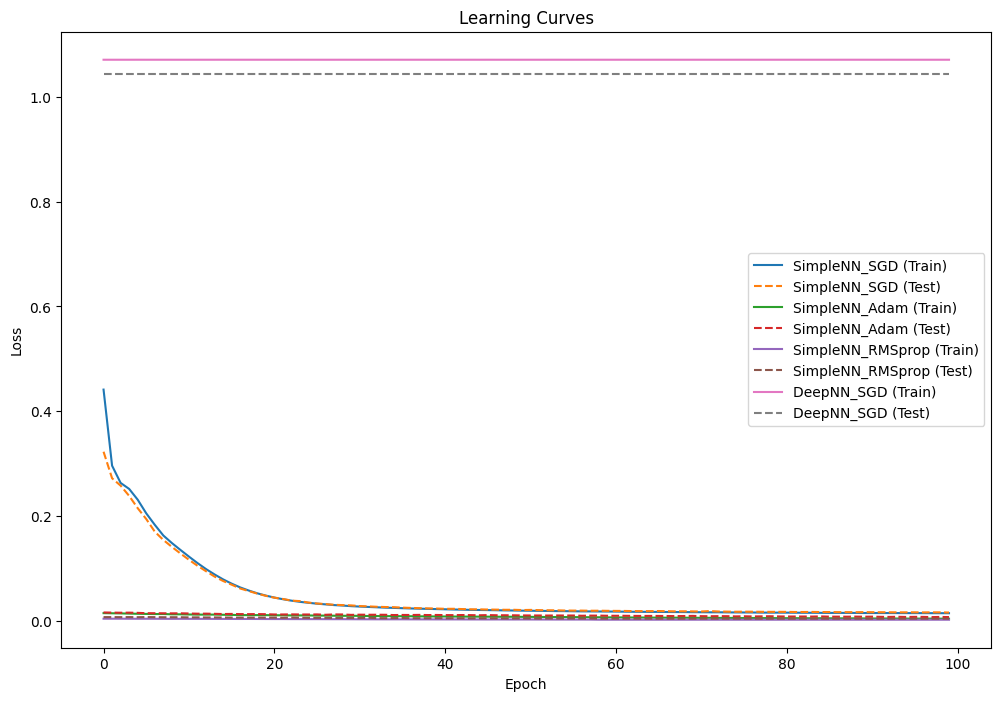

In [ ]:
import matplotlib.pyplot as plt

# Plot learning curves
plt.figure(figsize=(12, 8))

# Loop through each model and optimizer combination
for key, value in results.items():
    plt.plot(value["train_losses"], label=f"{key} (Train)")  # Plot training loss
    plt.plot(value["test_losses"], linestyle="--", label=f"{key} (Test)")  # Plot test loss

# Add labels and title
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Learning Curves")

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Task 3 (30 points)

Please remember the robot form the assigment on inverse kinematics. Let's learn the inverse kinematic function with a help of Neural Network.
1. Create a dataset. FK(Forward kinematics) function maps angles to coordinates.

Namely, $FK: (\theta_1, \theta_2)→(x,y)$.

Generate 200 random(but admissible) angle pairs $(\theta_1, \theta_2)$ and
compute corresponding to them coordinates $(x,y)=FK(\theta_1, \theta_2)$. This way you will get a dataset of shape $200\times 4$ with columns $\theta_1, \theta_2, x, y$.

2. Inverse kinematics function puts into maps coordinates into angles: $(\theta_1, \theta_2)=IK(x,y)$. Let's assume that we do not know the formulas and we want to learn them from the dataset. Train a Neural Network to learn the  $IK$ function. Use $(x,y)$ as the  input features and $(\theta_1, \theta_2)$ as target. The neural network should have 3 hidden layers and be trained on 100 epochs with any optimizer of your choice.

3. Add the new IK_learned method to your Robot class and compute a few examples with it.

In [ ]:
import math
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim


class Robot:
    def __init__(self, l1, l2, theta):
        self.l1 = l1
        self.l2 = l2
        self.T = self.FK(theta)
        self.trajPoints = []

    def FK(self, theta):
        x1 = self.l1 * math.cos(theta[0])
        y1 = self.l1 * math.sin(theta[0])
        x2 = x1 + self.l2 * math.cos(theta[0] + theta[1])
        y2 = y1 + self.l2 * math.sin(theta[0] + theta[1])
        self.T = [(x1, y1), (x2, y2)]
        return self.T

    def IK(self, x, y):
        theta = [0, 0]
        d = math.sqrt(x**2 + y**2)
        if d > (self.l1 + self.l2):
            return None
        cos_theta2 = (x**2 + y**2 - self.l1**2 - self.l2**2) / (2 * self.l1 * self.l2)
        theta[1] = math.acos(cos_theta2)
        k1 = self.l1 + self.l2 * math.cos(theta[1])
        k2 = self.l2 * math.sin(theta[1])
        theta[0] = math.atan2(y, x) - math.atan2(k2, k1)
        return theta

    def generateRandomTraj(self, n):
        self.trajPoints = []
        lim = (self.l1 + self.l2) * math.cos(math.pi / 4)
        self.trainInput = np.zeros((n, 2))  # (x, y)
        self.trainOutput = np.zeros((n, 2))  # (theta1, theta2)
        for i in range(n):
            x = random.uniform(0, lim)
            y = random.uniform(-lim, lim)
            self.trajPoints.append((x, y))
            self.trainInput[i, :] = [x, y]
            theta = self.IK(x, y)
            self.trainOutput[i, :] = [theta[0], theta[1]]


In [ ]:
class InverseKinematicsNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(InverseKinematicsNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [ ]:
robot = Robot(l1=1.0, l2=1.0, theta=[0.0, 0.0])

In [ ]:
# Generate a dataset of 200 random
robot.generateRandomTraj(200)
X = robot.trainInput  # Input features (x, y)
y = robot.trainOutput  # Target (theta1, theta2)

In [ ]:
# Convert the dataset to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [ ]:
# Initialize the model
input_size = 2
hidden_size = 64
output_size = 2  # theta1, theta2
model = InverseKinematicsNN(input_size, hidden_size, output_size)

In [ ]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [10/100], Loss: 2.5196
Epoch [20/100], Loss: 1.5997
Epoch [30/100], Loss: 0.7854
Epoch [40/100], Loss: 0.6958
Epoch [50/100], Loss: 0.5234
Epoch [60/100], Loss: 0.4175
Epoch [70/100], Loss: 0.3374
Epoch [80/100], Loss: 0.2759
Epoch [90/100], Loss: 0.2185
Epoch [100/100], Loss: 0.1654


In [ ]:
def IK_learned(self, x, y):
    input_tensor = torch.tensor([[x, y]], dtype=torch.float32)
    with torch.no_grad():
        output_tensor = model(input_tensor)
    return output_tensor.numpy().flatten().tolist()

In [ ]:
Robot.IK_learned = IK_learned

In [ ]:
test_points = [(0.5, 0.5), (1.0, 0.0), (0.7, 0.7)]
for point in test_points:
    x, y = point
    theta_learned = robot.IK_learned(x, y)
    theta_true = robot.IK(x, y)
    print(f"Point: ({x}, {y})")
    print(f"Learned IK: {theta_learned}")
    print(f"True IK: {theta_true}")
    print()

Point: (0.5, 0.5)
Learned IK: [-0.5065723657608032, 1.980049967765808]
True IK: [-0.4240310394907405, 2.4188584057763776]

Point: (1.0, 0.0)
Learned IK: [-0.8867664337158203, 1.9389616250991821]
True IK: [-1.0471975511965979, 2.0943951023931957]

Point: (0.7, 0.7)
Learned IK: [-0.13253839313983917, 1.9194056987762451]
True IK: [-0.26759239513779987, 2.1059811170704963]

